In [2]:
import pandas as pd # 데이터 구성 패키지:Siries, DataFrame
import numpy as np # 행렬 연산 패키지
import matplotlib #데이터 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns #데이터 시각화(추세 등) 패키지
from sklearn.preprocessing import scale, minmax_scale, robust_scale #Scaling클래스

plt.rc('font', family=r"/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/malgunbd.ttf")

#한글폰트적용
%matplotlib inline 
# matplotlib를 이용한 Background 그래프 실행 및 결과 확인

In [3]:
titanic = pd.read_csv("/home/pirl/Downloads/titanic.csv", engine = 'python', encoding = 'EUC-KR')

titanic.isnull().sum() 

#데이터 불러와서 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# 데이터 셋에서 불필요한 feature 삭제 (Cabin은 결측치가 과도하게 많다.)
titanic.drop('Cabin', axis=1, inplace=True)
titanic.isnull().sum()

KeyError: "['Cabin'] not found in axis"

In [10]:
def bar_chart(feature): #생존 여부에 대해 두개의 막대차트로 표시하는 함수
    survived = titanic[titanic['Survived']==1][feature].value_counts()
    dead = titanic[titanic['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

findfont: Font family ['/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/malgunbd.ttf'] not found. Falling back to DejaVu Sans.


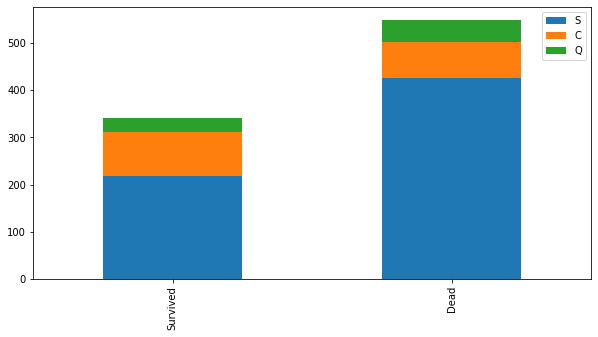

In [12]:
bar_chart('Embarked') #Embarked 결측치 파악하기 위해 Embarked Feature부터 입력

In [13]:
#Embarked에서 S가 가장 많으므로 2개의 결측치를 S로 변경후 확인
titanic["Embarked"].fillna("S", inplace = True)
titanic.isnull().sum()
#결측치가 없는 데이터가 되었음

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

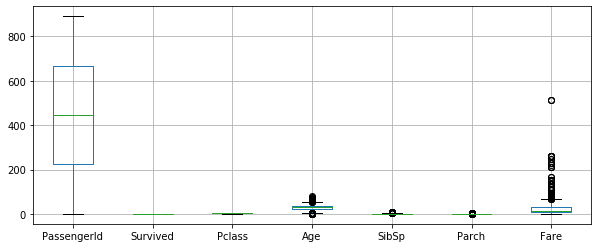

In [14]:
#숫자형 데이터중 이상치를 파악하기 위해 박스플롯을 출력
#fare부분에 400이 넘어가는 이상치를 발견
titanic.boxplot(figsize = (10,4)) 

In [18]:
#Fare 특징에서 구체적으로 400이 넘어가는 이상치를 확인하기 위한 과정
titanic[titanic["Fare"]>=400 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


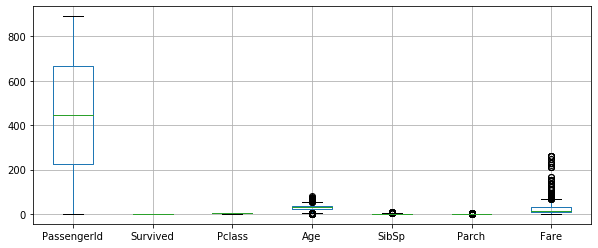

In [20]:
#Fare에서 400이 넘어가는 이상치를 삭제하고, boxplot을 통해 확인
titanic = titanic[titanic["Fare"]<400] 

titanic.reset_index(drop = True, inplace = True)
titanic.boxplot(figsize = (10,4)) 
#이제 결측치와 이상치가 없는 완전한 데이터가 되었다.

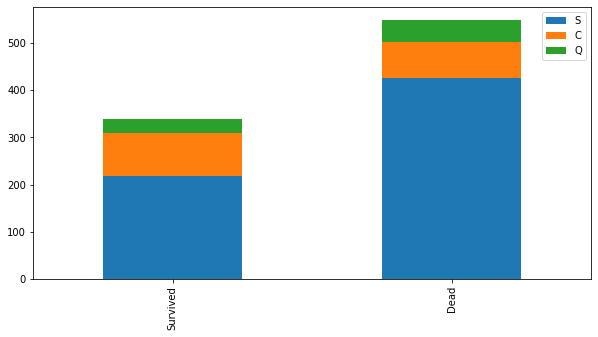

In [21]:
#이제 각 특징(공통점이 있는)별로 생존 여부와 관련한 그래프를 출력한다
#예를들어 PassengerId는 모두 다르므로 그래프에 의미가 없음
bar_chart('Embarked')
#생존자가 S>C>Q순으로 많음과 동시에 사망자도 S>C>Q순으로 많다.
#S와 Q는 생존자보다 사망자가 많지만, C는 생존자가 더 많다.

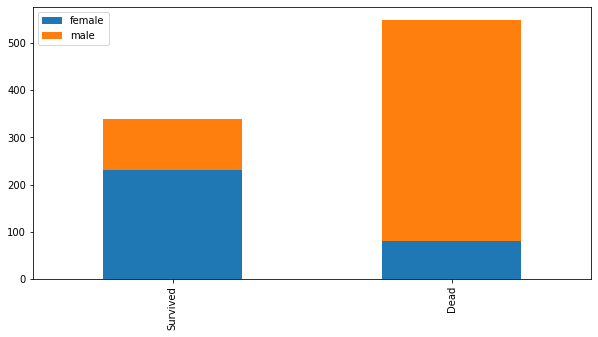

In [23]:
bar_chart('Sex')
#여성이 남성에 비해 생존률이 높다는 것을 확인할 수 있다.

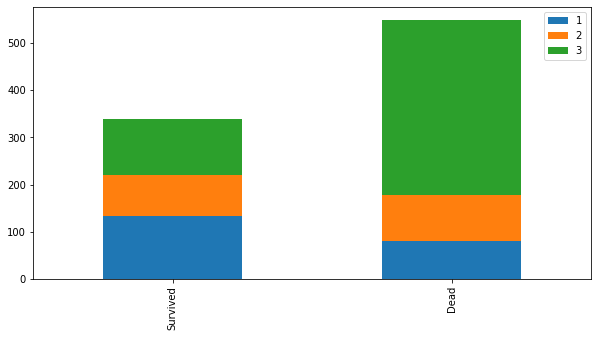

In [24]:
bar_chart('Pclass')
#3클래스 이용자의 사망자가 가장 많음을 알 수 있다.

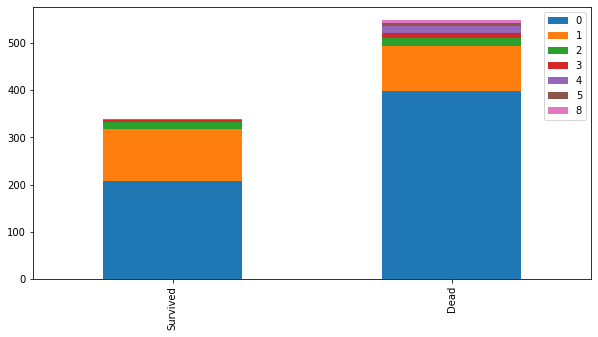

In [25]:
bar_chart('SibSp')
#혼자 있을때 살아남을 확률이 가장 높음 둘이 있을 때 두번 째로 살아남을 확률이 높음을 알 수 있다.

In [38]:
#Middle name을 기준으로 숫자를 카운트한다.
slice_name = [titanic]
for dataset in slice_name:
    dataset['Middlename'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)
titanic['Middlename'].value_counts()
# 남자> 미혼여성 > 기혼여성 > 의사순으로 사망자 수가 많음을 알 수 있다.

Mr          515
Miss        181
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Ms            1
Sir           1
Countess      1
Don           1
Mme           1
Capt          1
Jonkheer      1
Name: Middlename, dtype: int64

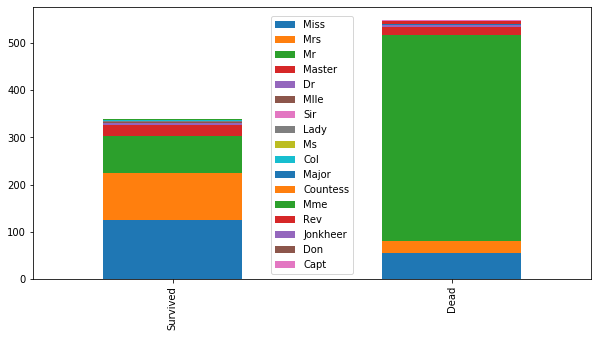

In [39]:
#전 단게의 결과를 차트로 그린것이다.
bar_chart('Middlename')

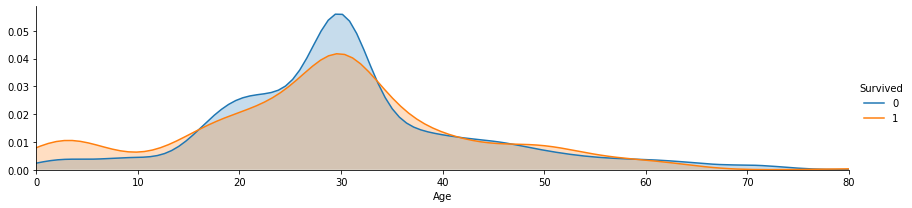

In [30]:
#1이 생존, 0이 사망을 의미한다.
#어린이 및 청소년의 생존확률이 높았다.
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

(0, 20)

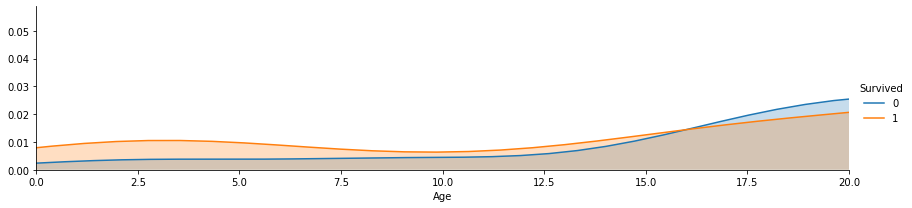

In [31]:
#0부터 20세까지의 생존확률이다. 약 16세를 기준으로 생존확률보다 사망확률이 높아진다.
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

(20, 40)

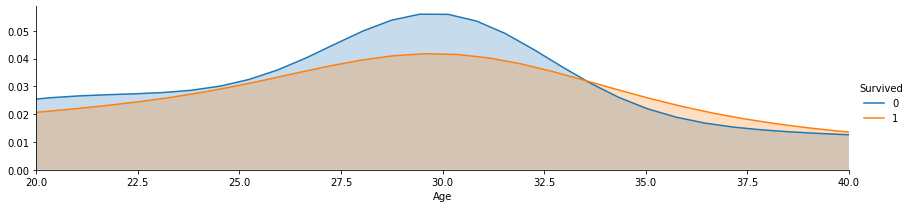

In [32]:
#20부터 40세까지의 생존확률이다
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
plt.xlim(20,40)

(40, 60)

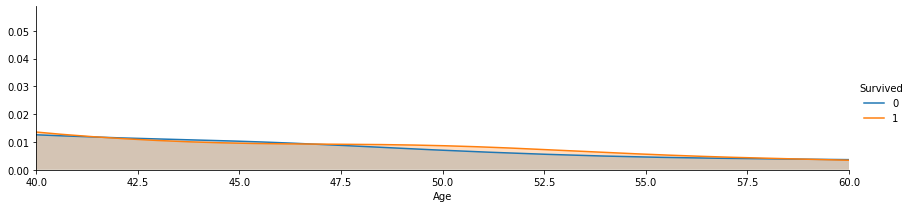

In [33]:
#40부터 60세까지의 생존확률이다
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

(60, 80)

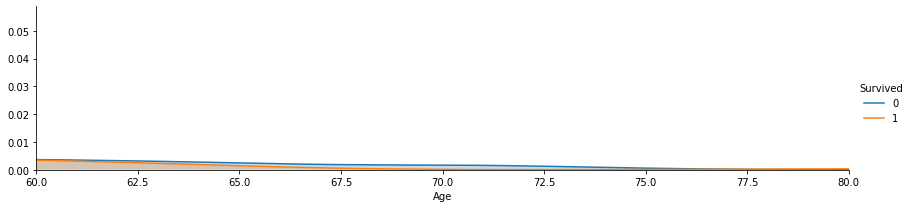

In [34]:
#60부터 80세까지의 생존확률이다
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
plt.xlim(60,80)

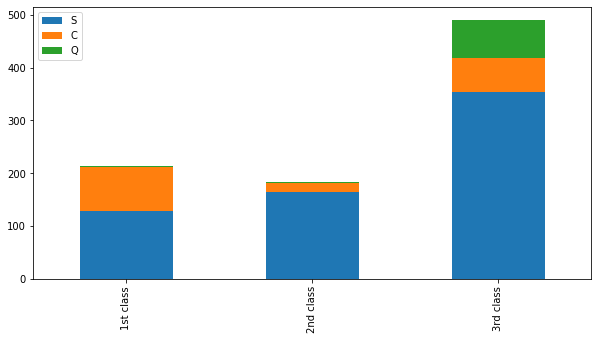

In [42]:
#pclass와 Embarked와의 상관관계 그래프이다.
Pclass1 = titanic[titanic['Pclass']==1]['Embarked'].value_counts()
Pclass2 = titanic[titanic['Pclass']==2]['Embarked'].value_counts()
Pclass3 = titanic[titanic['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

#Q 도시에서 탄 사람들은 1, 2등급이 거의 없다는 사실을 알 수 있다.

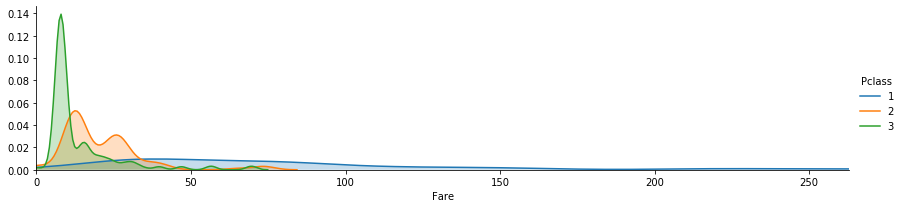

In [41]:
#Fare와 Pclass와의 상관관계 그래프이다.
facet = sns.FacetGrid(titanic, hue="Pclass", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, titanic['Fare'].max()))
facet.add_legend()

plt.show()
#Pclass의 숫자가 작을수록 가격이 높다.

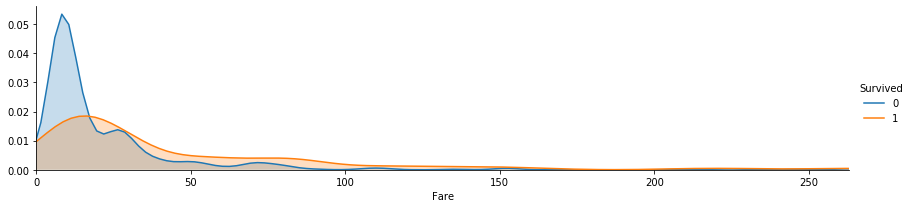

In [36]:
#Fare와 생존 확률을 나타낸 그래프이다.
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, titanic['Fare'].max()))
facet.add_legend()

plt.show()
#싼 티켓을 구매한 사람은 사망률이 높고 비싼 티켓을 구매한 사람은 생존률이 높다는 것을 알 수 있다.

# 결론을 정리하면 다음과 같다:
 1. 어릴 수록 생존 확률이 높으나, 16세를 기점으로 생존 확률이 높지는 않다.
 2. 여성생존자가 남성 생존자보다 높으며, 미혼 여성이 기혼 여성보다 사망자가 많다.
 3. 동행자가 없는 생존자가 가장 많았으며, 보통 동행자가 많을 수록 사망확률이 올라갔다.
 4. 비싼 티켓을 구매할 수록 생존자가 많았다.
 5. Pclass의 숫자가 작을 수록 가격이 높았다.
 6. Pclass의 숫자가 높을 수록 사망자가 많았다.
 7. Q 도시에서 탄 사람들은 1, 2등급이 거의 없다.
 
 => 1번과 3번에 의하여, 성인이 어린아이를 보호해서 동행자(가족)이 있는 성인의 사망률이 높은 것이 아닐까?
 => 2번과 3번에 의하여, 동행자가 있을 수록 동행자를 지키기 위해서 희생하기 때문에 사망률이 높은 것이 아닐까?
 => 4번과 5번과 6번에 의하여, pclass의 숫자가 작을 수록 안전한 좌석이 아닐까?
 => 5번과 6번과 7번에 의하여. Q도시에는 가난한 사람들이 살지 않을까?